In [51]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'
import missingno as msno
from tqdm import tqdm_notebook

# <font color='blue'> 2.  검색어(57개)를 주제어로 TF-IDF 생성
### <font color='brown'> Df-Idf- start
https://github.com/thejungwon/text-mining-course
## 2.1 정규화 TF(Term Frequency) 행렬, term(t,d) = term(t,d)/N(d)

In [2]:
df = pd.read_pickle('../1399_output/dataset_keywords.pkl')
df = df.dropna()
df.drop(columns=['신고일시', '내용'], axis=1, inplace = True)

df.columns

df.shape
print('nan, inf & -inf의 개수는 ?  ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

Index(['상한', '변질', '썩은', '곰팡이', '벌레', '구더기', '부패', '불량', '냄새', '악취',
       ...
       '품목제조정지', '시정명령', '적합', '회수', '폐기', '판매중단', '시험검사', '반복', '오인', '차단'],
      dtype='object', length=313)

(51483, 313)

nan, inf & -inf의 개수는 ?   0


In [3]:
tf_matrix_origin = df

tf_matrix = tf_matrix_origin.div(tf_matrix_origin.sum(axis=1), axis=0)
tf_matrix.shape
tf_matrix.head()
print('nan, inf & -inf의 개수는 ?  ', tf_matrix.isin([np.nan, np.inf, -np.inf]).any(1).sum())

(51483, 313)

,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.250000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


nan, inf & -inf의 개수는 ?   0


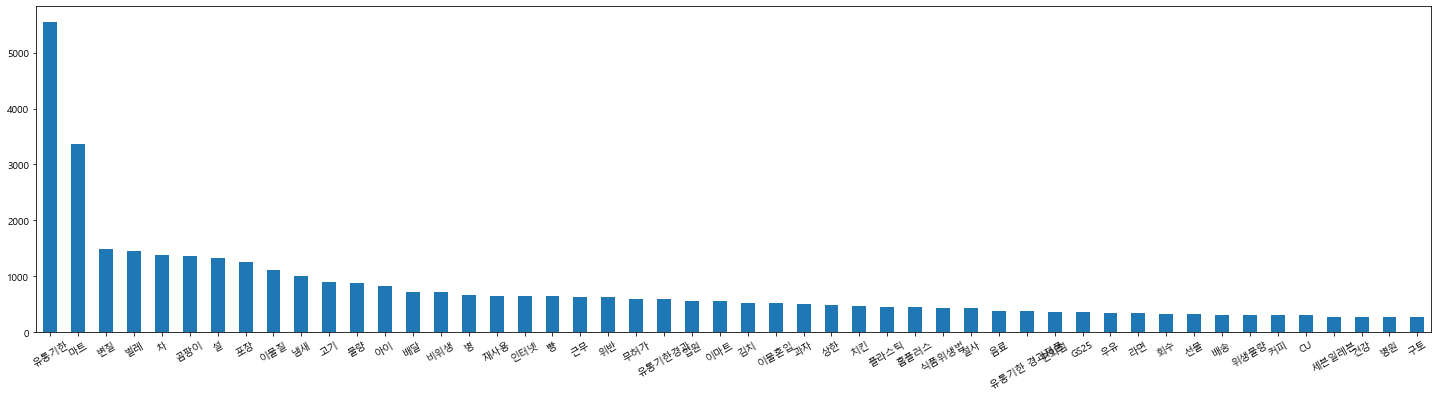

In [4]:
tf_matrix.T.sum(axis=1).sort_values(ascending=False)[0:50].plot(kind='bar', rot = '30', figsize=(25,6))

## 2.2. DF 매트릭스 표현

In [5]:
df_matrix = (tf_matrix_origin>0).sum(axis=0)
df_matrix

상한      1896
변질      5772
썩은       655
곰팡이     4436
벌레      4083
        ... 
판매중단       7
시험검사      15
반복       169
오인       277
차단        20
Length: 313, dtype: int64

## 2.3.  IDF 매트릭스 계산

In [6]:
#idf(t) = log(N/(df + 1))
N = tf_matrix_origin.shape[0]
idf_matrix = np.log(N/df_matrix+1)
idf_matrix.head()

상한     3.337671
변질     2.294496
썩은     4.377014
곰팡이    2.534151
벌레     2.610739
dtype: float64

## 2.4.  TF-IDF 매트릭스 계산

In [7]:
# tf-idf(t, d) = tf(t, d) * log(N/(df + 1))
tf_idf_matrix = tf_matrix * idf_matrix
#tf_idf_matrix.index = np.arange(0, len(tf_idf_matrix))
tf_idf_matrix.shape
tf_idf_matrix.head()

(51483, 313)

,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
0,0.0,0.0,0.0,0.0,2.610739,0.0,0.0,0.0,0.000000,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.435123,0.0,0.0,0.0,0.438452,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.657678,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print('nan, inf & -inf의 개수는 ?  ', tf_idf_matrix.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf의 개수는 ?   0


#  Zipf's Laws 확인해보기

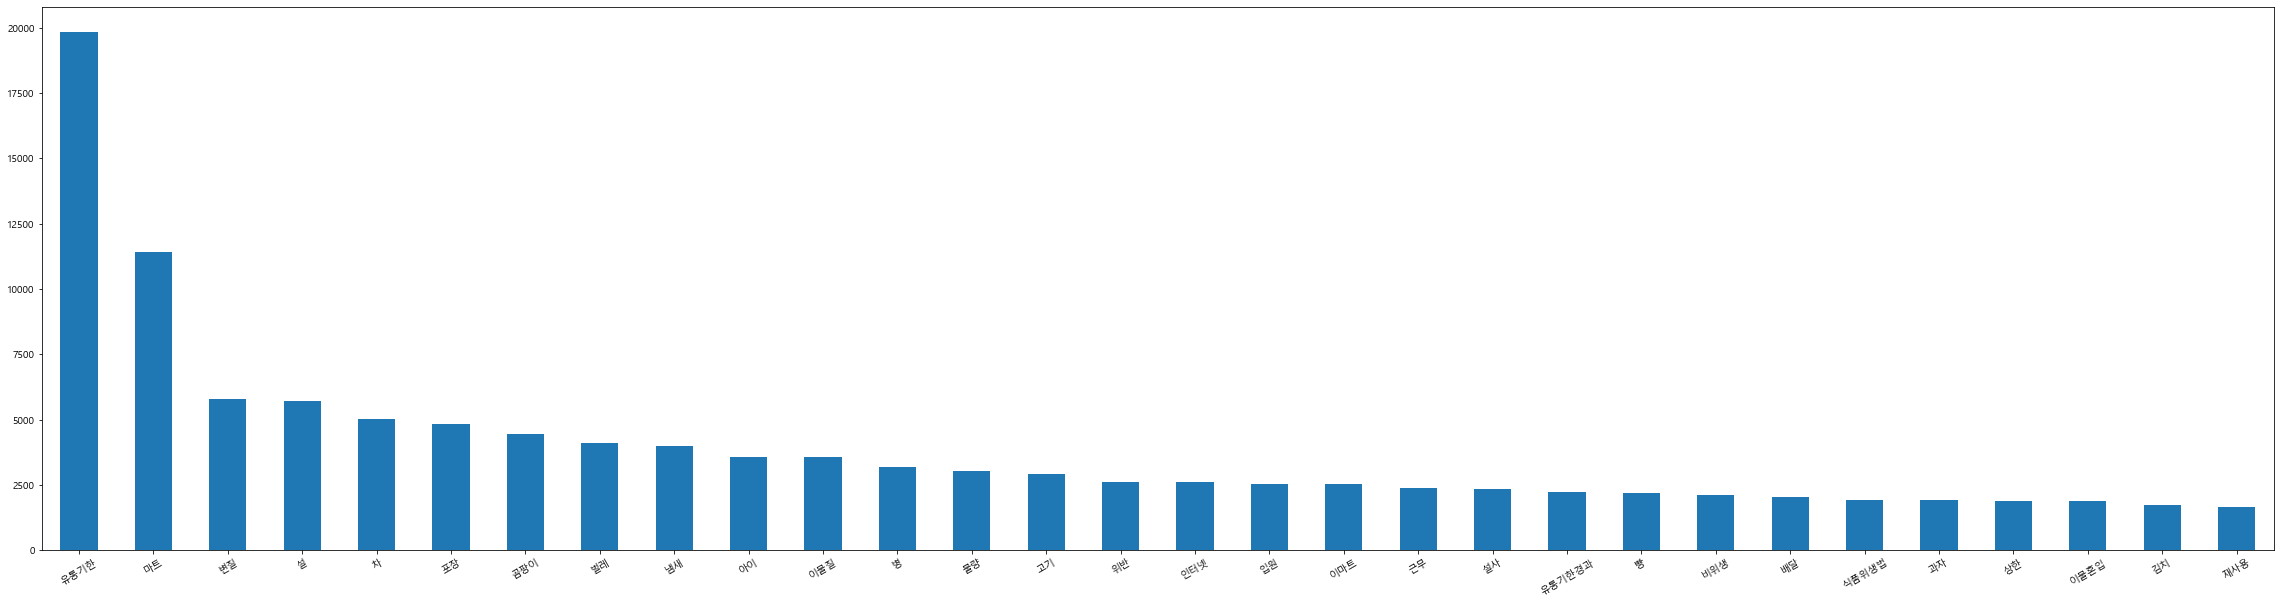

In [10]:
words = tf_matrix_origin.sum().sort_values(ascending=False)[:30]
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
ax = words.plot.bar(x='word', y='tf', rot='30',figsize=(40, 10))

## 키워드 빈도수 분석
### X = TfidfTransformer().fit_transform(X) 대신 수작업으로 X를 했음
DOC-Term Matrix 계산

In [11]:
tf_idf_matrix = tf_idf_matrix.fillna(0)
tf_idf_matrix

,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
0,0.0,0.0,0.0,0.000000,2.610739,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.435123,0.0,0.0,0.0,0.438452,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.657678,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52879,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52880,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52881,0.0,0.0,0.0,0.506830,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52882,0.0,0.0,0.0,0.422359,0.000000,0.0,0.0,0.0,0.438452,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### DOC-Term Matrix 각 단어에 대한 합

In [12]:
X = tf_idf_matrix.values ; type(X)
X.sum(axis=0)
len(X.sum(axis=0)) # 검색어기준으로 합산

numpy.ndarray

array([1.63780959e+03, 3.43768834e+03, 6.92723636e+02, 3.47912190e+03,
       3.78959828e+03, 6.87702233e+02, 1.71576370e+02, 2.56269775e+03,
       2.65336966e+03, 3.57229580e+02, 2.22455201e+02, 2.58504205e+02,
       1.20170237e+02, 1.39758410e+02, 6.18063829e+01, 1.95780322e+02,
       2.73027041e+02, 2.71225659e+00, 3.55456451e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.07492846e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.14349242e+00,
       1.54636568e+01, 0.00000000e+00, 4.83790080e+02, 4.49980963e+01,
       1.88416878e+03, 2.98410071e+02, 1.39713752e+02, 0.00000000e+00,
       2.79450980e+01, 5.42451318e+00, 0.00000000e+00, 3.61634212e+00,
       0.00000000e+00, 0.00000000e+00, 3.07797454e+03, 7.10059905e+02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.03414779e+01,
       9.36901242e+01, 1.77252983e+03, 3.03961779e+03, 1.92516891e+03,
      

313

### <font color='blue'> 5년동안 검색어(57개) TF-IDF기준 빈도수 분석

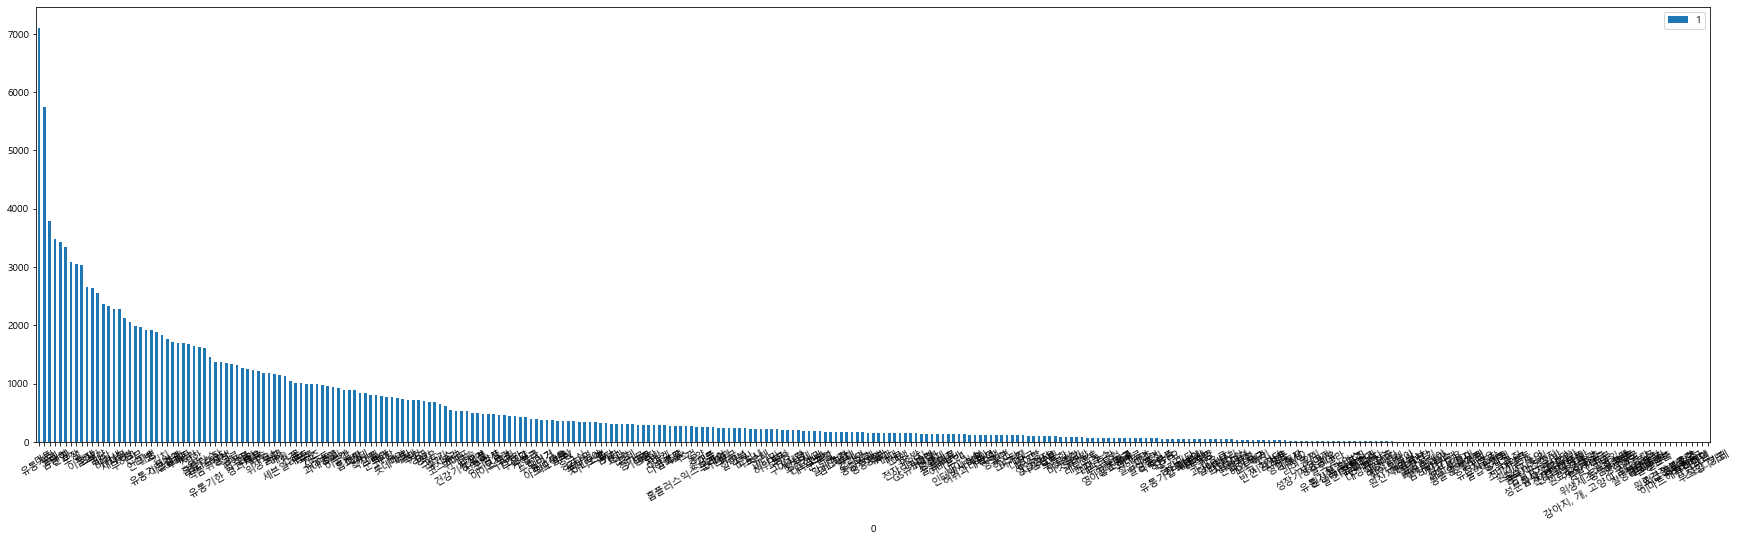

In [13]:
fn = '../output/KF_'

count = X.sum(axis=0)
idx = np.argsort(-count)
count = count[idx]

feature_name = np.array(tf_idf_matrix.columns)[idx]

keyword_list = list(zip(feature_name, count))
result_df = pd.DataFrame(keyword_list)

result_df.to_csv(fn, header=None)

plt.rcParams['font.family']='Malgun Gothic'
result_df.set_index(0).plot(kind='bar', rot='30', figsize=(30,8))
plt.savefig('../output/주제어빈도수_막대.png')

In [14]:
result_df

,0,1
0,유통기한,7106.110146
1,마트,5749.248064
2,벌레,3789.598282
3,곰팡이,3479.121896
4,변질,3437.688335
...,...,...
308,병원성균,0.000000
309,규격미달,0.000000
310,미승인,0.000000
311,부적합 성분,0.000000


# <font color='green'> 4. 연도별 키워드 빈도수 분석

In [15]:
df = pd.read_pickle('../1399_output/dataset_keywords.pkl')
df = df.dropna()
df.head()

,신고일시,내용,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
0,2015-01-02,"2014-01-01, `오뚜기옛날자른당면`을 개봉하여 조리를 하기 위해 물에 담가보...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-02,12/30 여주마트에서 땅콩을 구매하심.\n1/1 제품을 개봉하여 드심.\n일부가 ...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-02,*유통기한경과*\n민원인이 1월 1일 오전 8시 47분경 세븐일레븐 강남2호점에서 ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-02,"오늘 민원인께서 공군회관 맞은편 씨유편의점에서 `롯데 아몬드 빼빼로`를 구입하였고,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-02,12/31 소담(수입식품가게)에서 무장아찌구매하심.\n유통기한이 13.02.28까지...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df = pd.read_pickle('../1399_output/dataset_keywords.pkl')
df = df.dropna()
df.drop(columns=['내용'], axis=1, inplace = True)
df['신고일시'] = pd.to_datetime(df['신고일시']) # 년도별 검색을 위해
df.head()


,신고일시,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
0,2015-01-02,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-02,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-02,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
start_year = 2015
end_year = 2019

corpus = [""] * len(df)

result_df = pd.DataFrame()

# 녇도별 문서 추출 후 키워드 빈도수 분석

for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_index = (df['신고일시'] >= start_date) & (df['신고일시'] <= end_date)
    temp_df = df[dt_index]
    temp_df.drop(columns=['신고일시'], axis=1, inplace = True)
    temp_df.head(3)
    tf_matrix_origin = temp_df
    tf_matrix = tf_matrix_origin.div(tf_matrix_origin.sum(axis=1), axis=0)
    df_matrix = (tf_matrix_origin>0).sum(axis=0)
    N = tf_matrix_origin.shape[0]
    idf_matrix = np.log(N/df_matrix+1)
    tf_idf_matrix = tf_matrix * idf_matrix
    tf_idf_matrix = tf_idf_matrix.fillna(0)
    X = tf_idf_matrix.values
    
    count = X.sum(axis=0)
    idx = np.argsort(-count)
    count = count[idx]

    feature_name = np.array(tf_idf_matrix.columns)[idx]

    result = list(zip(feature_name, count))
    result = pd.DataFrame(result)
    result.columns=[str(year) + ' 키워드','빈도수']
    result_df = pd.concat([result_df,result],axis=1)

fn = '../1399_output/KF_년도별 주제어.xlsx'
    
result_df.to_excel(fn)

,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
9744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9746,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
20099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
30774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30776,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
41708,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 최근에 검색을 한 일회용 ~~ 검색어는 생략하고 주제어 추출을 해야 할 듯
## 아니면 num을 50개정도만 정해서 해도 되겠으이

In [23]:
result_df.head()
result_df.columns

,2015 키워드,빈도수,2016 키워드,빈도수,2017 키워드,빈도수,2018 키워드,빈도수,2019 키워드,빈도수
0,유통기한,1164.693840,유통기한,1463.300352,유통기한,1362.465186,유통기한,1451.074849,유통기한,1646.491766
1,마트,1084.290462,마트,1346.933969,마트,1202.699103,마트,1078.905706,마트,1004.095339
2,차,743.271697,벌레,818.796615,벌레,811.356229,벌레,744.088718,벌레,780.481864
3,이물질,704.360686,변질,787.253920,변질,790.736071,포장,741.444377,설,700.006597
4,곰팡이,682.573639,곰팡이,755.680372,곰팡이,708.246974,변질,686.292988,곰팡이,661.209589


Index(['2015 키워드', '빈도수', '2016 키워드', '빈도수', '2017 키워드', '빈도수', '2018 키워드',
       '빈도수', '2019 키워드', '빈도수'],
      dtype='object')

## 네트웍분석

In [21]:
type = pd.read_excel('../1399_data/관심주제어.xlsx')
type.head()

,유형,주제어,신유형
0,무허가/무신고 식품,무신고,위반
1,무허가/무신고 식품,무허가,위반
2,병원성 미생물 등에 오염된 위해우려 식품,대장균,미생물
3,병원성 미생물 등에 오염된 위해우려 식품,바이러스,미생물
4,병원성 미생물 등에 오염된 위해우려 식품,병원성균,미생물


In [68]:
data = pd.merge(result_df, type[['유형','주제어']], left_on ='2015 키워드', right_on='주제어')
del data['주제어']
data.rename(columns={'유형': '2015_유형'}, inplace = True)

data = pd.merge(data, type[['주제어', '유형']], left_on ='2016 키워드', right_on='주제어')
del data['주제어']
data.rename(columns={'유형': '2016_유형'}, inplace = True)

data = pd.merge(data, type[['주제어', '유형']], left_on ='2017 키워드', right_on='주제어')
del data['주제어']
data.rename(columns={'유형': '2017_유형'}, inplace = True)

data = pd.merge(data, type[['주제어', '유형']], left_on ='2018 키워드', right_on='주제어')
del data['주제어']
data.rename(columns={'유형': '2018_유형'}, inplace = True)

data = pd.merge(data, type[['주제어', '유형']], left_on ='2019 키워드', right_on='주제어')
del data['주제어']
data.rename(columns={'유형': '2019_유형'}, inplace = True)

In [69]:
data.columns = ['2015 키워드', '2015 빈도수', '2016 키워드', '2016 빈도수', '2017 키워드', '2017 빈도수', '2018 키워드',
       '2018 빈도수', '2019 키워드', '2019 빈도수', '2015_유형', '2016_유형', '2017_유형',
       '2018_유형', '2019_유형']
data.head()
data.columns

,2015 키워드,2015 빈도수,2016 키워드,2016 빈도수,2017 키워드,2017 빈도수,2018 키워드,2018 빈도수,2019 키워드,2019 빈도수,2015_유형,2016_유형,2017_유형,2018_유형,2019_유형
0,유통기한,1164.693840,유통기한,1463.300352,유통기한,1362.465186,유통기한,1451.074849,유통기한,1646.491766,유통기한 위/변조식품,유통기한 위/변조식품,유통기한 위/변조식품,유통기한 위/변조식품,유통기한 위/변조식품
1,곰팡이,682.573639,곰팡이,755.680372,곰팡이,708.246974,변질,686.292988,곰팡이,661.209589,부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품
2,곰팡이,682.573639,곰팡이,755.680372,곰팡이,708.246974,변질,686.292988,곰팡이,661.209589,부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품,"유해물질 기준, 규격 부적합 식품"
3,곰팡이,682.573639,곰팡이,755.680372,곰팡이,708.246974,변질,686.292988,곰팡이,661.209589,부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품,"유해물질 기준, 규격 부적합 식품",부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품
4,곰팡이,682.573639,곰팡이,755.680372,곰팡이,708.246974,변질,686.292988,곰팡이,661.209589,부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품,"유해물질 기준, 규격 부적합 식품",부패/변질된 위해 우려 식품,"유해물질 기준, 규격 부적합 식품"


Index(['2015 키워드', '2015 빈도수', '2016 키워드', '2016 빈도수', '2017 키워드', '2017 빈도수',
       '2018 키워드', '2018 빈도수', '2019 키워드', '2019 빈도수', '2015_유형', '2016_유형',
       '2017_유형', '2018_유형', '2019_유형'],
      dtype='object')

Big plot
====

In [70]:
data.sort_values(by='2015_유형', ascending=False).head()

,2015 키워드,2015 빈도수,2016 키워드,2016 빈도수,2017 키워드,2017 빈도수,2018 키워드,2018 빈도수,2019 키워드,2019 빈도수,2015_유형,2016_유형,2017_유형,2018_유형,2019_유형
27,함량미달,0.000000,원산지 미표기,0.000000,소비자혼동,0.000000,유전자조작,0.000000,원산지 속인,0.000000,"제품의 성분(함량)품질, 가격을 속인 식품",원산지를 속인 식품,질병치료나 의약품으로 오인/혼동 광고식품,사용이 금지된 물질함유 식품,원산지를 속인 식품
38,유사성분혼입,0.000000,질병감염동물,0.000000,가소재,0.000000,가소재,0.000000,다이옥신,0.000000,"제품의 성분(함량)품질, 가격을 속인 식품","불법도축, 병든 고기나 그 원료로 만든 식품",유독/유해 물질이 함유된 식품용기/포장,유독/유해 물질이 함유된 식품용기/포장,"유해물질 기준, 규격 부적합 식품"
35,품질위조,0.000000,중금속용출,0.000000,가소제용출,0.000000,원료성분용출,0.000000,밀수입,0.000000,"제품의 성분(함량)품질, 가격을 속인 식품",유독/유해 물질이 함유된 식품용기/포장,유독/유해 물질이 함유된 식품용기/포장,유독/유해 물질이 함유된 식품용기/포장,수입 신고를 하지않고 반입된 식품
11,곰팡이,682.573639,곰팡이,755.680372,곰팡이,708.246974,변질,686.292988,곰팡이,661.209589,"유해물질 기준, 규격 부적합 식품",부패/변질된 위해 우려 식품,"유해물질 기준, 규격 부적합 식품",부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품
14,곰팡이,682.573639,곰팡이,755.680372,곰팡이,708.246974,변질,686.292988,곰팡이,661.209589,"유해물질 기준, 규격 부적합 식품","유해물질 기준, 규격 부적합 식품",부패/변질된 위해 우려 식품,부패/변질된 위해 우려 식품,"유해물질 기준, 규격 부적합 식품"


<Figure size 1440x360 with 0 Axes>

[Text(0, 0.5, '2015 키워드'), Text(0.5, 0, 'Overall')]

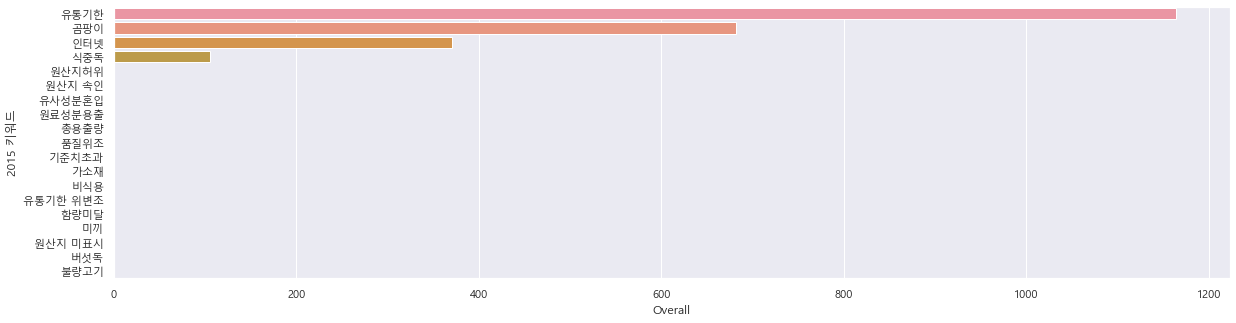

<Figure size 1440x360 with 0 Axes>

[Text(0, 0.5, '2016 키워드'), Text(0.5, 0, 'Overall')]

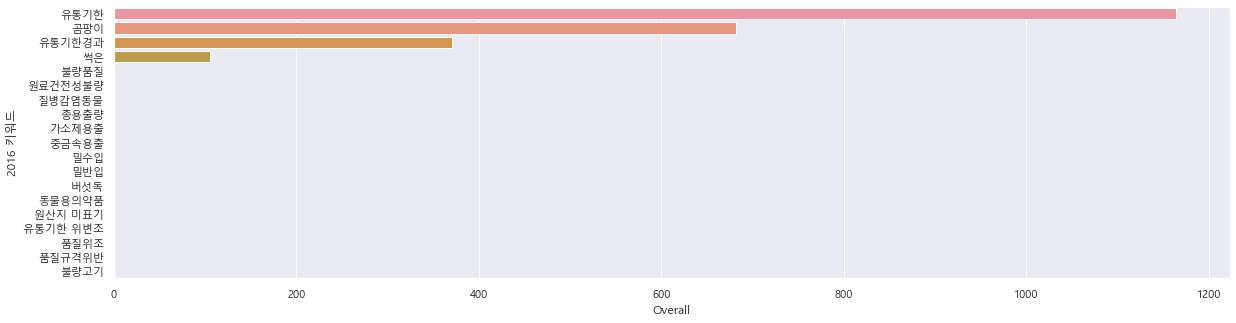

<Figure size 1440x360 with 0 Axes>

[Text(0, 0.5, '2017 키워드'), Text(0.5, 0, 'Overall')]

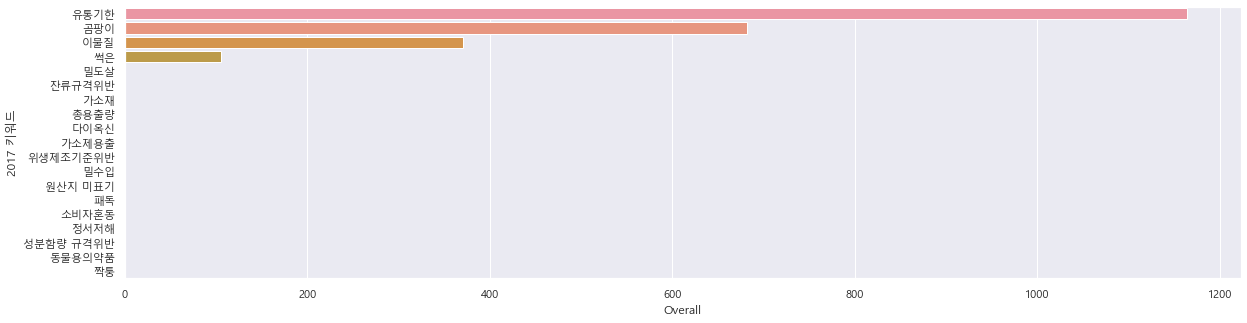

<Figure size 1440x360 with 0 Axes>

[Text(0, 0.5, '2018 키워드'), Text(0.5, 0, 'Overall')]

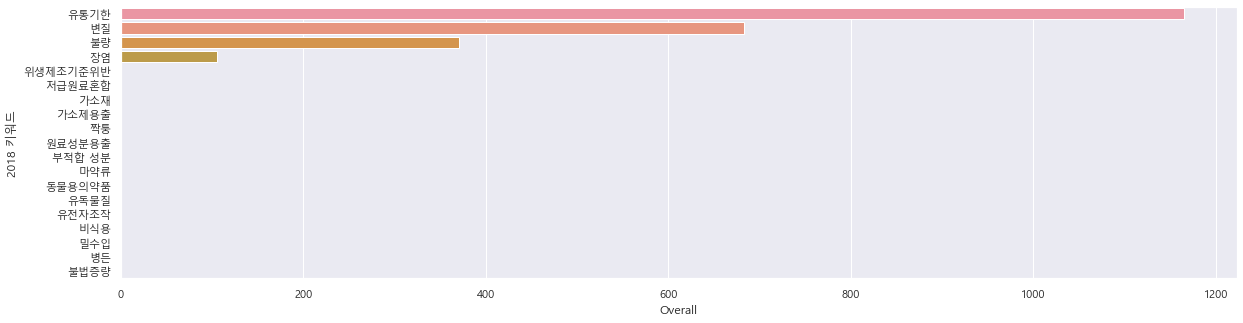

<Figure size 1440x360 with 0 Axes>

[Text(0, 0.5, '2019 키워드'), Text(0.5, 0, 'Overall')]

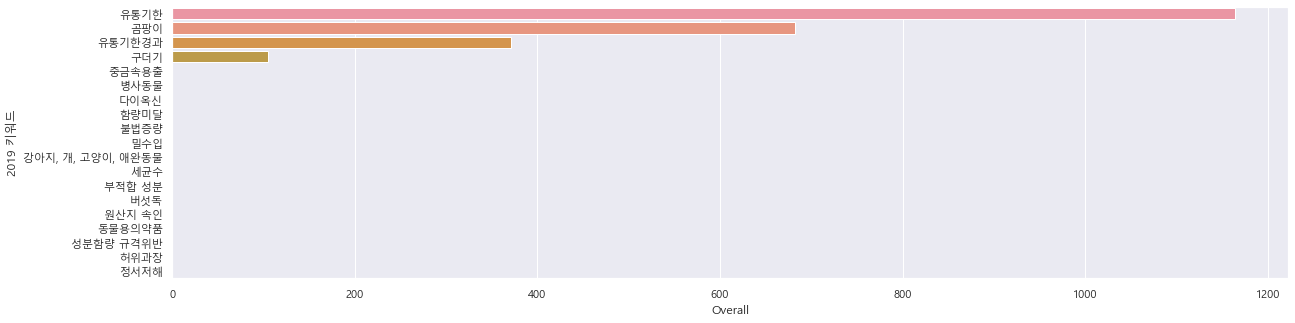

In [71]:
for i in ['2015 키워드', '2016 키워드', '2017 키워드', '2018 키워드', '2019 키워드'] :
    plt.figure(figsize=(20,5))
    ax = sns.barplot(x='2015 빈도수',y=i,data=data.sort_values(by='2015 빈도수', ascending=False))
    ax.set(xlabel='Overall', ylabel=i)
    plt.show()

<Figure size 1440x360 with 0 Axes>

[Text(0, 0.5, '2015_유형'), Text(0.5, 0, 'Overall')]

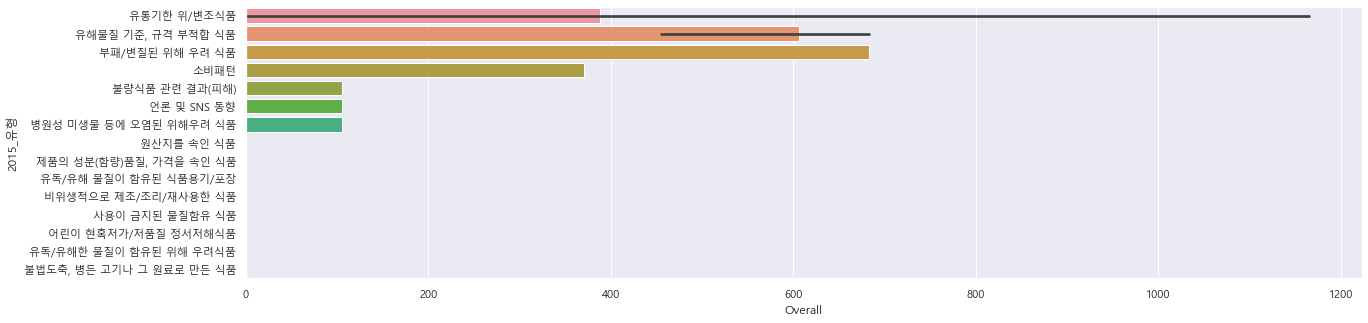

<Figure size 1440x360 with 0 Axes>

[Text(0, 0.5, '2016_유형'), Text(0.5, 0, 'Overall')]

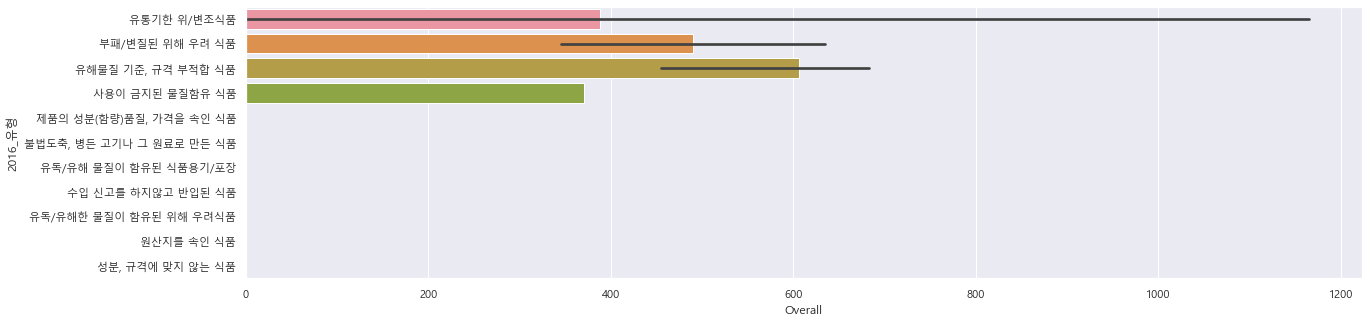

<Figure size 1440x360 with 0 Axes>

[Text(0, 0.5, '2017_유형'), Text(0.5, 0, 'Overall')]

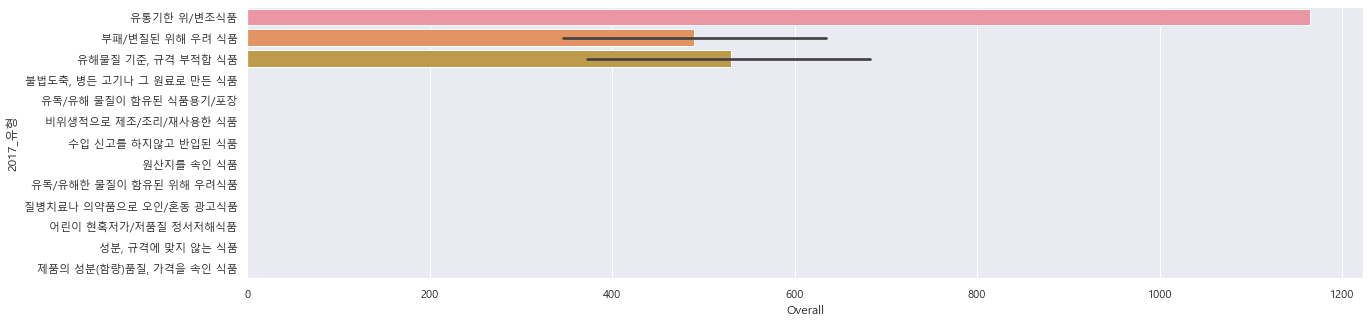

<Figure size 1440x360 with 0 Axes>

[Text(0, 0.5, '2018_유형'), Text(0.5, 0, 'Overall')]

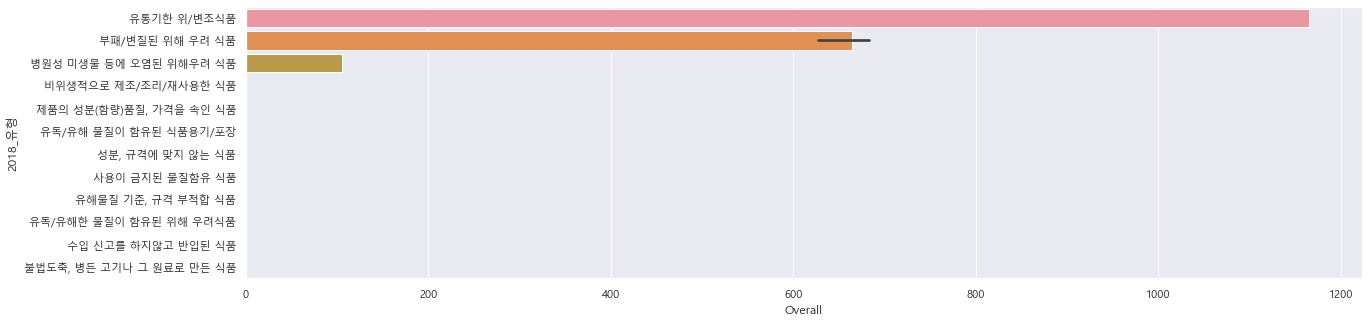

<Figure size 1440x360 with 0 Axes>

[Text(0, 0.5, '2019_유형'), Text(0.5, 0, 'Overall')]

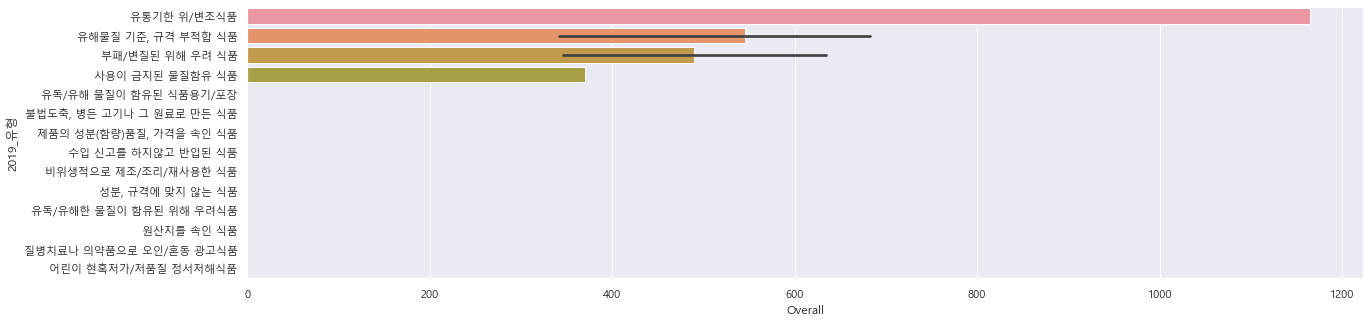

In [72]:
for i in ['2015_유형', '2016_유형', '2017_유형', '2018_유형', '2019_유형'] :
    plt.figure(figsize=(20,5))
    ax = sns.barplot(x='2015 빈도수',y=i,data=data.sort_values(by='2015 빈도수', ascending=False))
    ax.set(xlabel='Overall', ylabel=i)
    plt.show()

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 17
Average degree:   1.7000


<Figure size 1440x1440 with 0 Axes>

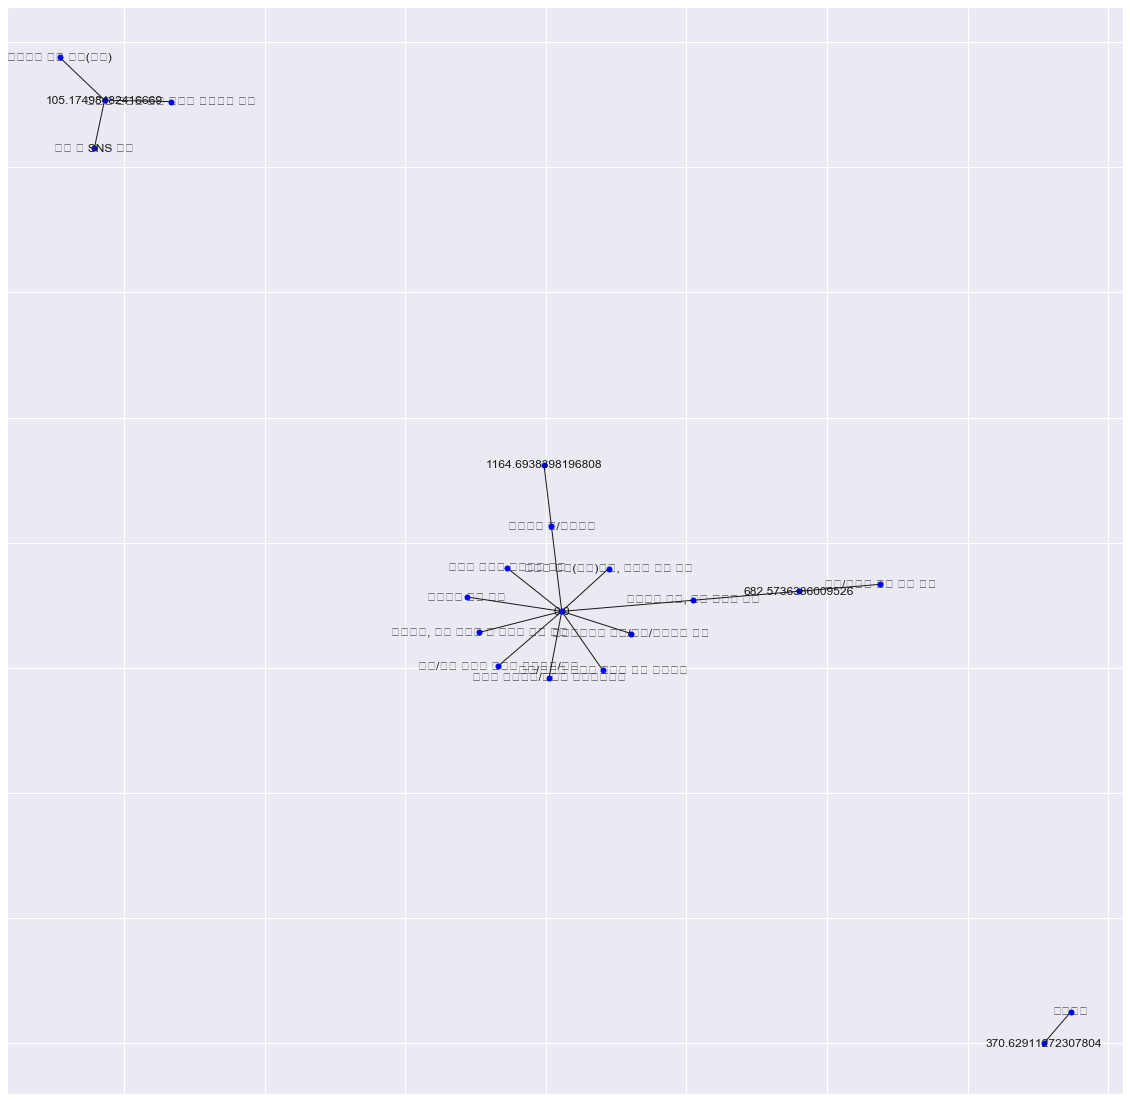

In [75]:
import networkx as nx

g = nx.Graph()
#g = nx.from_pandas_dataframe(data,source='Name',target='Type 1')
g = nx.from_pandas_edgelist(data,source='2015_유형',target='2015 빈도수') # 2015 키워드
#g = nx.from_pandas_edgelist(tf,source='Name',target='Type 2')
print(nx.info(g))
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(g, k=0.15)
nx.draw_networkx(g,pos,node_size=25, node_color='blue')
plt.show()

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 17
Average degree:   1.7000


<Figure size 1440x1440 with 0 Axes>

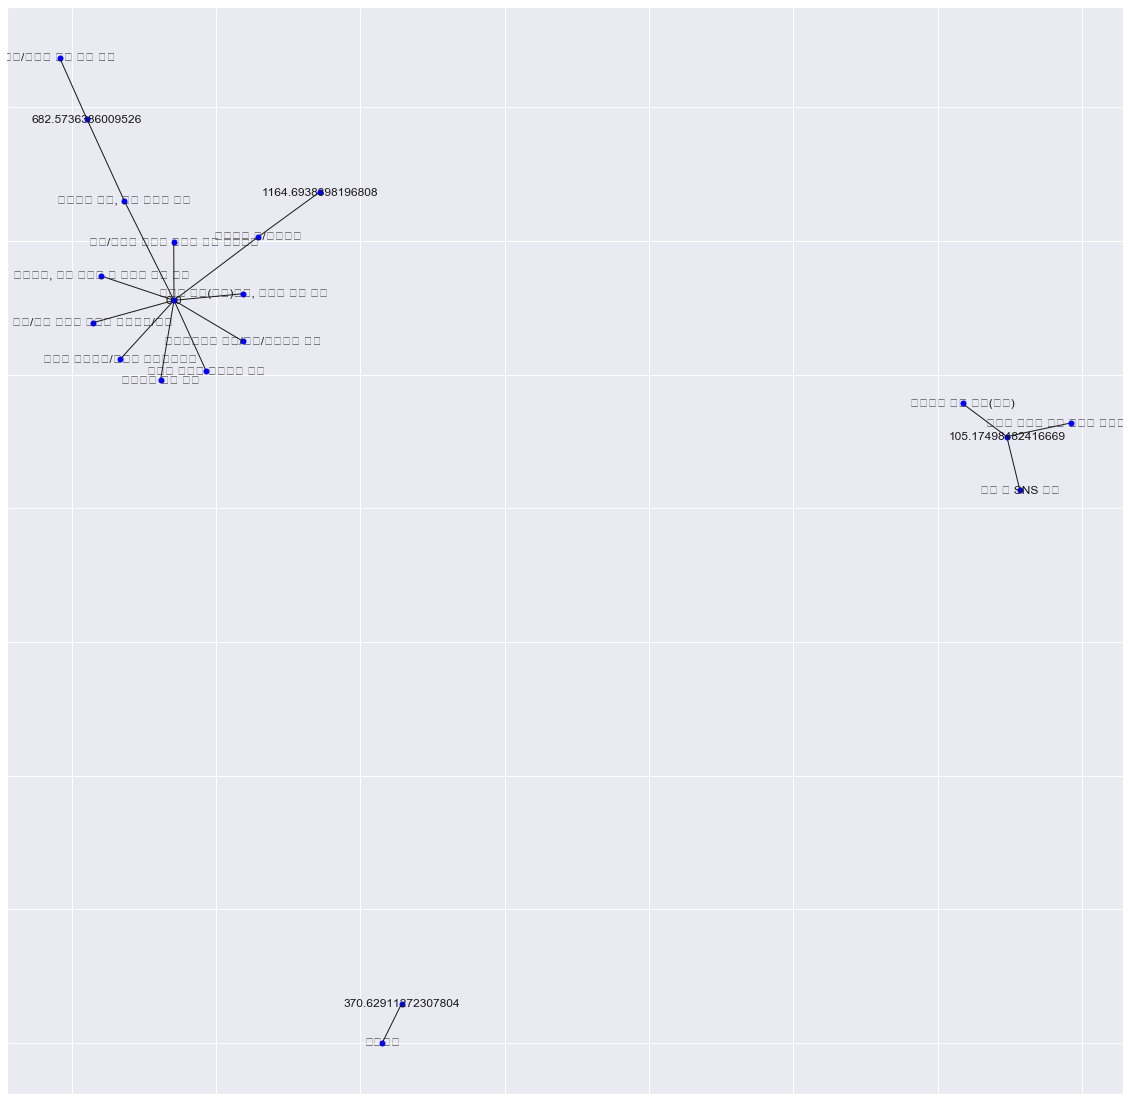

In [76]:
g = nx.from_pandas_edgelist(data,source='2015_유형',target='2015 빈도수')
#g = nx.from_pandas_edgelist(tf,source='Name',target='Type 2')
print(nx.info(g))
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(g, k=0.15)
nx.draw_networkx(g,pos,node_size=25, node_color='blue')
plt.show()

# <font color='green'> 5. 연도별 키워드 특정 키워드 트랜드 분석
- 연도별로 나누어서 주요 키워드 출력
- 시작년도, 끝년도 지정

In [77]:
df = pd.read_pickle('../1399_output/dataset_keywords.pkl')
df = df.dropna()
df.head()

,신고일시,내용,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
0,2015-01-02,"2014-01-01, `오뚜기옛날자른당면`을 개봉하여 조리를 하기 위해 물에 담가보...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-02,12/30 여주마트에서 땅콩을 구매하심.\n1/1 제품을 개봉하여 드심.\n일부가 ...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-02,*유통기한경과*\n민원인이 1월 1일 오전 8시 47분경 세븐일레븐 강남2호점에서 ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-02,"오늘 민원인께서 공군회관 맞은편 씨유편의점에서 `롯데 아몬드 빼빼로`를 구입하였고,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-02,12/31 소담(수입식품가게)에서 무장아찌구매하심.\n유통기한이 13.02.28까지...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from ckonlpy.tag import Twitter
twitter = Twitter()

In [74]:
keyword_list

Index(['상한', '변질', '썩은', '곰팡이', '벌레', '구더기', '부패', '불량', '냄새', '악취',
       ...
       '품목제조정지', '시정명령', '적합', '회수', '폐기', '판매중단', '시험검사', '반복', '오인', '차단'],
      dtype='object', length=313)

In [76]:
df['내용']
df.shape

0        2014-01-01, `오뚜기옛날자른당면`을 개봉하여 조리를 하기 위해 물에 담가보...
1        12/30 여주마트에서 땅콩을 구매하심.\n1/1 제품을 개봉하여 드심.\n일부가 ...
2        *유통기한경과*\n민원인이 1월 1일 오전 8시 47분경 세븐일레븐 강남2호점에서 ...
3        오늘 민원인께서 공군회관 맞은편 씨유편의점에서 `롯데 아몬드 빼빼로`를 구입하였고,...
4        12/31 소담(수입식품가게)에서 무장아찌구매하심.\n유통기한이 13.02.28까지...
                               ...                        
52879    <세븐일레븐 응암푸르지오점 유통기한 경과 제품 판매>\n민원인은 2019-12-30...
52880                     <코랄칼슘마그네슘플러스비타민디 가품 의심> 한글 파일 첨부
52881    <노브랜드맛있는 군밤 곰팡이 이물 발견>\n민원인은 2019-12-11 노브랜드 마...
52882    <브라질넛 위해성의심> \n민원인은 2019-12월 중순경, 이마트 트레이더스 구성...
52883    <분말한천 이취>\n민원인은 2019-12-29 쿠팡(판매처: (주)우리가스토리, ...
Name: 내용, Length: 51483, dtype: object

(51483, 315)

In [72]:
# 시작년도, 끝년도 지정
start_year = 2015
end_year = 2019

result_df = pd.DataFrame()
keyword_list = tf_idf_matrix.columns # tf_idf_matrix.columns[0:50] 일회용을 제외하고 싶으면

# 녇도별 문서 추출 후 키워드 빈도수 분석
    
result_df = pd.DataFrame()
result_df2  = pd.DataFrame()

for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
    print(year)
    corpus = [] 
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_index = (df['신고일시'] >= start_date) & (df['신고일시'] <= end_date)
    temp_df = df[dt_index]
    s_ndocs = temp_df.shape[0]
     
    
    corpus=[]
    for fn in temp_df['내용'] :
        corpus.append(fn)
    
    s_corpus_str = "".join(corpus)
    
    result_list = []
    result_list2 = []

    for k in keyword_list:
        result_list.append(s_corpus_str.count(k))  
        result_list2.append(s_corpus_str.count(k) / (s_ndocs+1))  
        
    temp_df = pd.DataFrame(result_list,columns=[str(year)])
    temp_df2 = pd.DataFrame(result_list2,columns=[str(year)])
    
    result_df = pd.concat([result_df,temp_df],axis=1)
    result_df2 = pd.concat([result_df2,temp_df2],axis=1)
    
result_df.index=  keyword_list
result_df
result_df2.index=  keyword_list
result_df2

C:\Users\NFSI291\Anaconda3\lib\site-packages\tqdm\__init__.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  TqdmDeprecationWarning)


2015
2016
2017
2018
2019



,2015,2016,2017,2018,2019
상한,314,525,591,471,471
변질,1502,2639,2786,2387,1775
썩은,120,147,182,169,163
곰팡이,1207,1552,1799,1791,1967
벌레,1042,1378,1832,1566,1514
...,...,...,...,...,...
판매중단,1,0,2,4,0
시험검사,5,2,9,5,0
반복,43,26,25,49,36
오인,43,82,74,58,52


,2015,2016,2017,2018,2019
상한,0.037632,0.050695,0.055358,0.043235,0.042261
변질,0.180010,0.254828,0.260959,0.219111,0.159264
썩은,0.014382,0.014195,0.017048,0.015513,0.014625
곰팡이,0.144655,0.149865,0.168509,0.164402,0.176492
벌레,0.124880,0.133063,0.171600,0.143749,0.135846
...,...,...,...,...,...
판매중단,0.000120,0.000000,0.000187,0.000367,0.000000
시험검사,0.000599,0.000193,0.000843,0.000459,0.000000
반복,0.005153,0.002511,0.002342,0.004498,0.003230
오인,0.005153,0.007918,0.006931,0.005324,0.004666


In [77]:
result_df.to_excel('../1399_output/관심주제어_년도별분포.xlsx')
result_df2.to_excel('../1399_output/관심주제어_년도별분포02.xlsx')

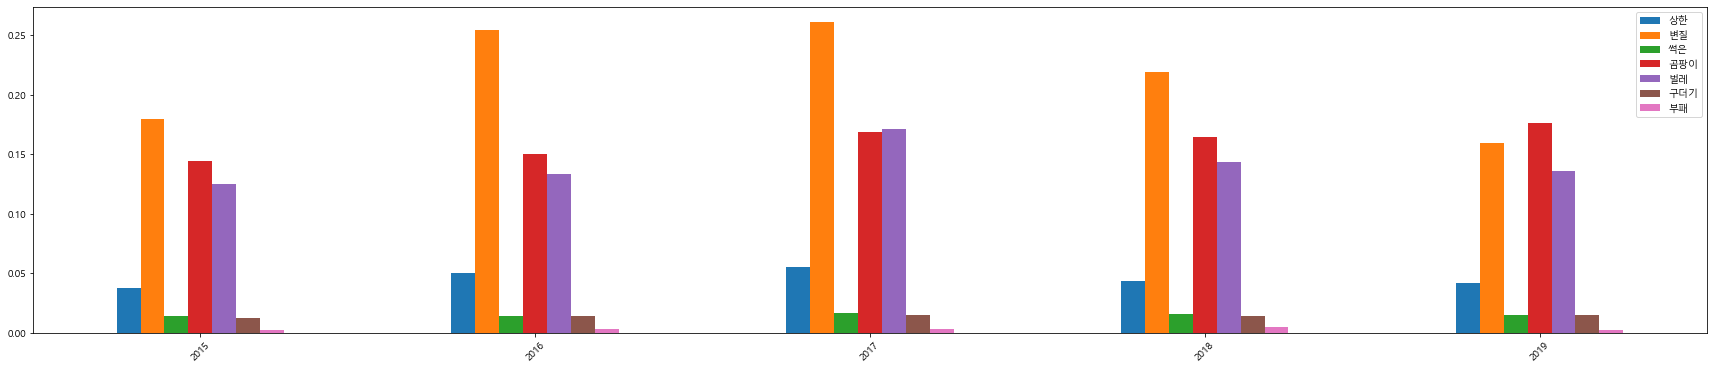

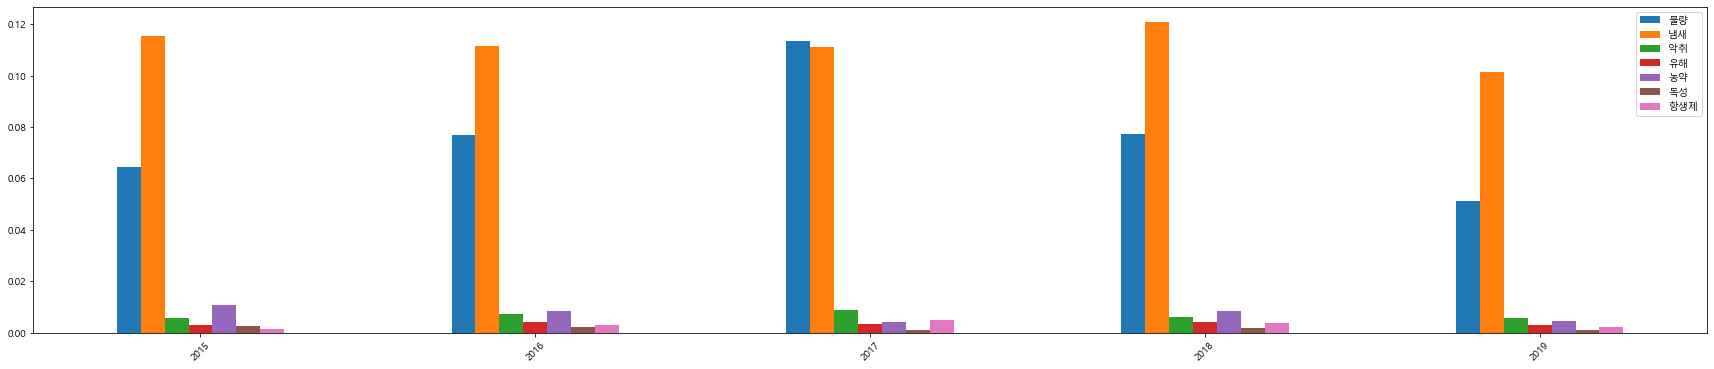

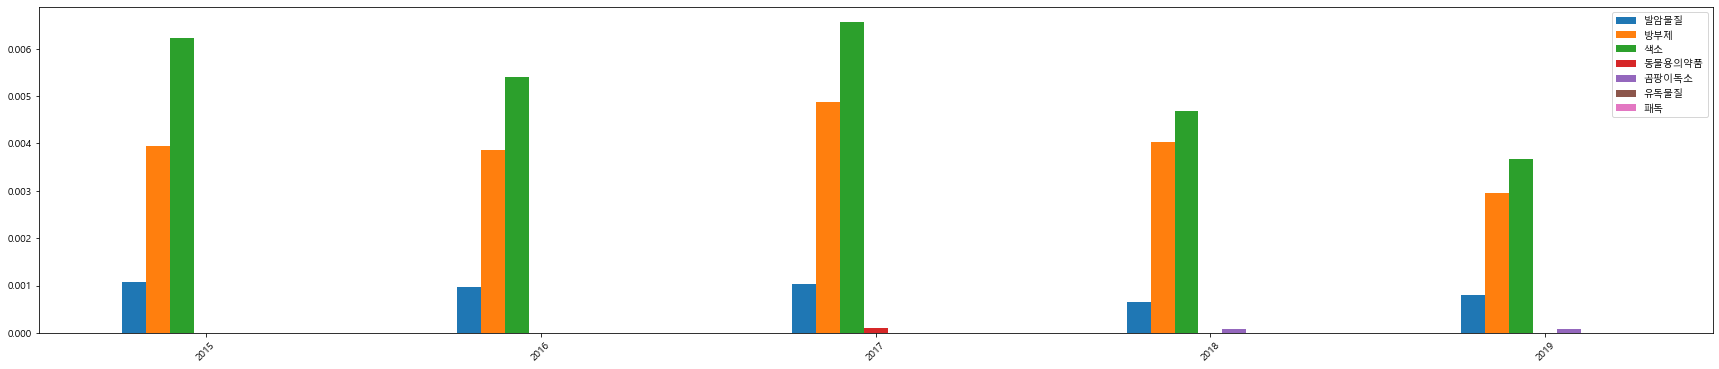

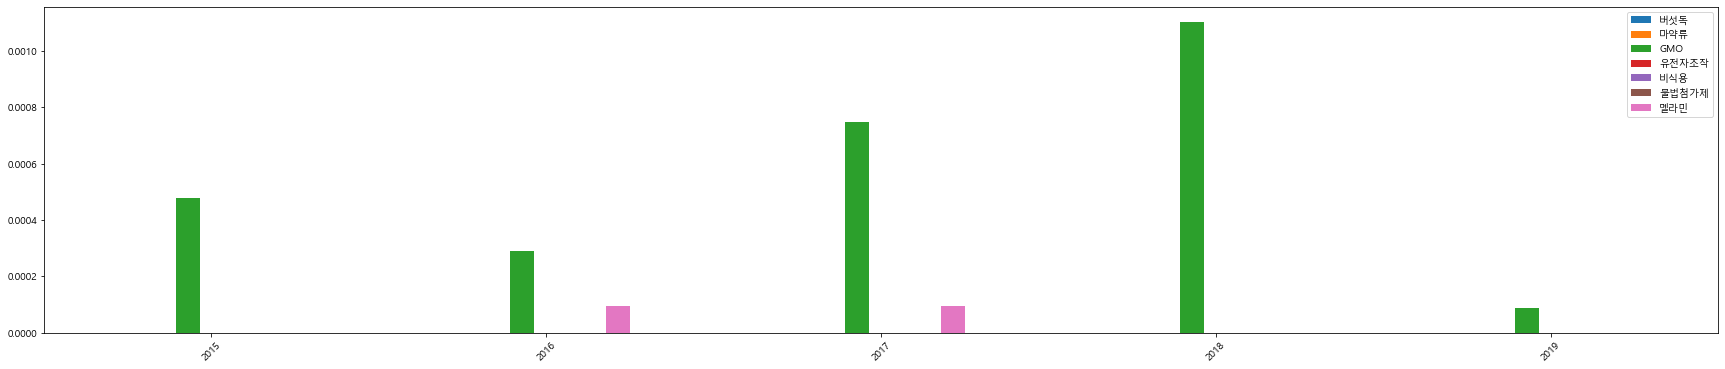

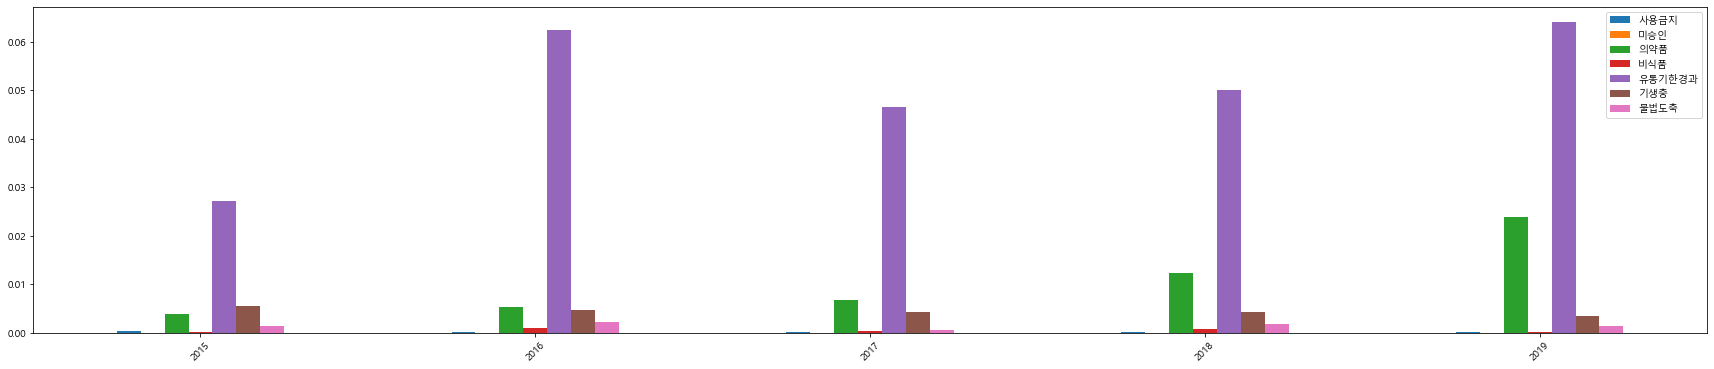

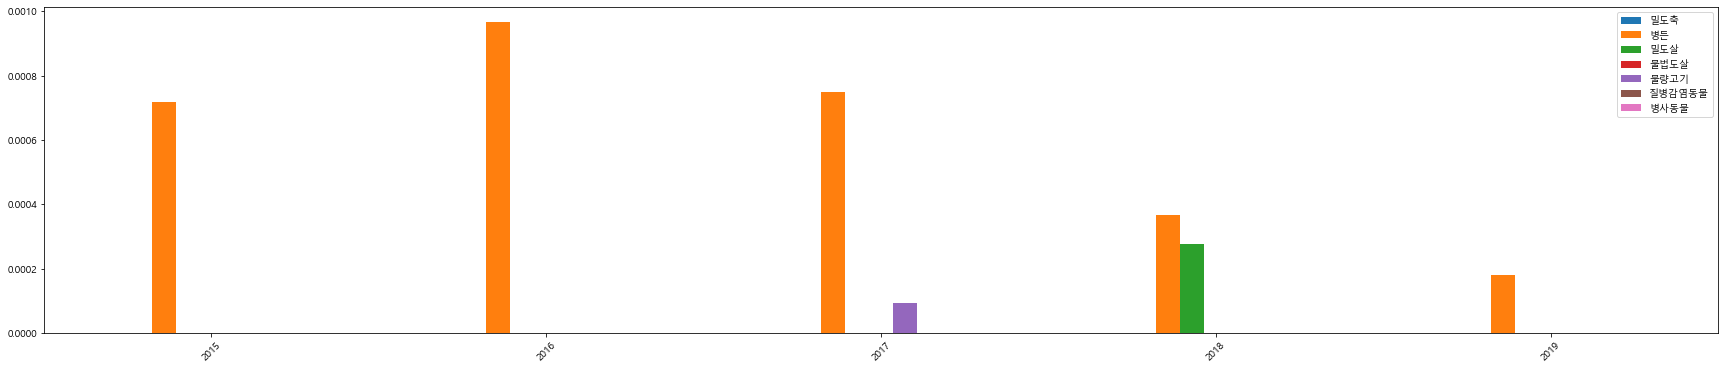

In [93]:
result_df2.dropna()[0:7].T.plot.bar(rot='45', figsize=(30,6)); plt.savefig('../1399_output/막대1.png')
result_df2.dropna()[7:14].T.plot.bar(rot='45', figsize=(30,6)); plt.savefig('../1399_output/막대2.png')
result_df2.dropna()[14:21].T.plot.bar(rot='45', figsize=(30,6)); plt.savefig('../1399_output/막대3.png')
result_df2.dropna()[21:28].T.plot.bar(rot='45', figsize=(30,6)); plt.savefig('../1399_output/막대4.png')
result_df2.dropna()[28:35].T.plot.bar(rot='45', figsize=(30,6)); plt.savefig('../1399_output/막대5.png')
result_df2.dropna()[35:42].T.plot.bar(rot='45', figsize=(30,6)); plt.savefig('../1399_output/막대6.png')

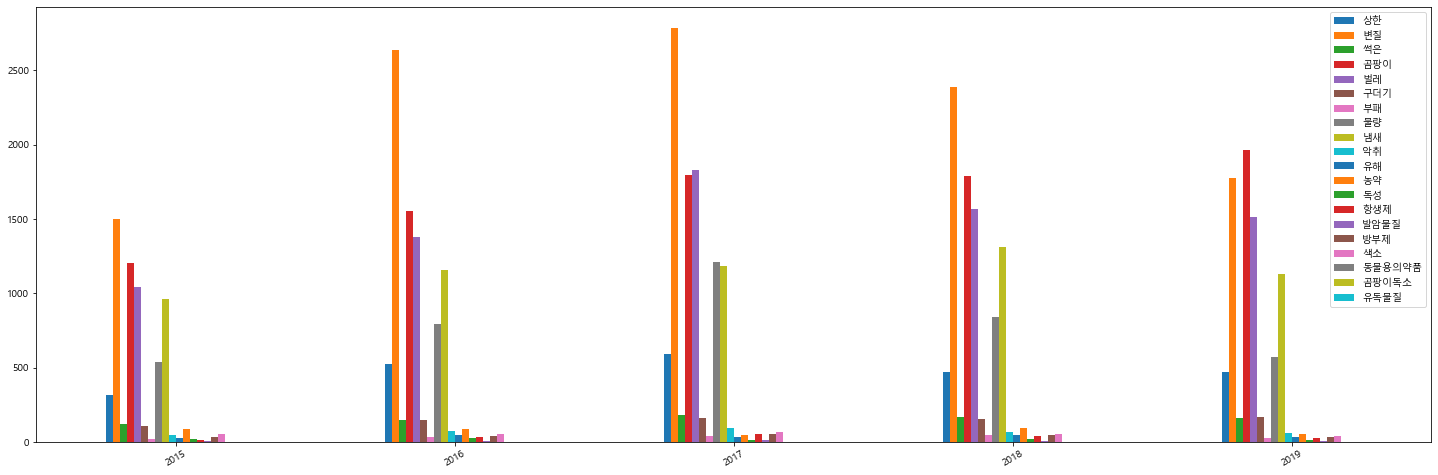

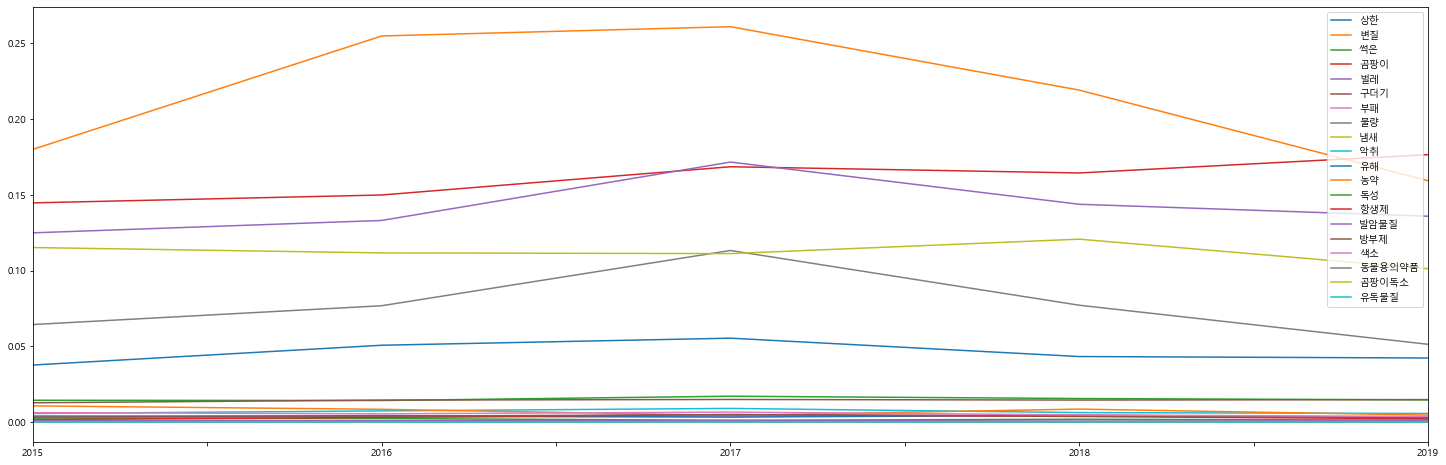

In [73]:
plt.rcParams['font.family']='Malgun Gothic'
# 막대그래프
result_df[0:20].T.plot.bar(rot='30', figsize=(25,8))
plt.savefig('../1399_output/년도별검색어빈도수_막대.png')

# 라인그래프
result_df2[0:20].T.plot.line(figsize=(25,8))
plt.savefig('../1399_output/년도별검색어빈도수)2_막대.png')

# <font color='green'> 6. LDA 분석 : 토픽 모델링 분석
### topic_words 변수를 통해 각 주제별 단어 확인 가능

In [34]:
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim
import pyLDAvis.sklearn
import collections

C:\Users\NFSI291\Anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


### X값을 다시 정의하여야 함 (년도별로 잘라졌음)

In [36]:
df = pd.read_pickle('../1399_output/dataset_keywords.pkl')
df = df.dropna()
df.drop(columns=['내용'], axis=1, inplace = True)
tf_matrix_origin = df.drop(columns=['신고일시'], axis=1, inplace = True)
tf_matrix_origin = df
tf_matrix = tf_matrix_origin.div(tf_matrix_origin.sum(axis=1), axis=0)
df_matrix = (tf_matrix_origin>0).sum(axis=0)
N = tf_matrix_origin.shape[0]
idf_matrix = np.log(N/df_matrix+1)
tf_idf_matrix = tf_matrix * idf_matrix
tf_idf_matrix = tf_idf_matrix.fillna(0)
X = tf_idf_matrix.values

In [53]:
start_year = 2015
end_year = 2019
n_topics = [7]
random_seed = 1004

In [54]:
for i in tqdm_notebook(n_topics):
        
    # LDA 수횅
    lda = LatentDirichletAllocation(n_components = i,learning_method="batch",random_state=random_seed)
    document_topics = lda.fit_transform(X)

    sorting = np.argsort(lda.components_, axis=1)[:,::-1]
    feature_names = np.array(tf_idf_matrix.columns)

    # 각 문서별 주제번호 할당
    topic_list = np.argmax(document_topics,axis=1).tolist()

    topic_words = pd.DataFrame(feature_names[sorting])
    topic_words = topic_words.T
    topic_words = topic_words

    # 파일경로 지정
    fpath =  "../1399_output/"  + "lda_result_n_" + str(i) + "_" + str(random_seed) + "_"

    # 파일 저장
    document_topics = pd.DataFrame(document_topics)
    document_topics.to_csv(fpath + "document_topic.csv",header=None,index=False,encoding="UTF8")
    topic_words.to_excel(fpath + "topic_words.xlsx")

    

C:\Users\NFSI291\Anaconda3\lib\site-packages\tqdm\__init__.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  TqdmDeprecationWarning)


In [55]:
X.shape
document_topics.shape
topic_words.shape
len(topic_list)

(51483, 313)

(51483, 7)

(313, 7)

51483

In [56]:
document_topics.to_excel(fpath + "document_topics.xlsx")
document_topics
topic_words.head()

,0,1,2,3,4,5,6
0,0.039565,0.039565,0.762584,0.039565,0.039593,0.039565,0.039565
1,0.039120,0.039154,0.340245,0.038829,0.464903,0.038974,0.038776
2,0.034798,0.034793,0.034787,0.791111,0.034783,0.034785,0.034942
3,0.031893,0.031860,0.031829,0.032159,0.031829,0.808610,0.031819
4,0.729255,0.045167,0.045128,0.045157,0.045078,0.045135,0.045080
...,...,...,...,...,...,...,...
51478,0.040431,0.040176,0.040172,0.040205,0.040117,0.040086,0.758813
51479,0.869934,0.021678,0.021678,0.021678,0.021678,0.021678,0.021678
51480,0.043157,0.741797,0.043210,0.043027,0.042908,0.042988,0.042912
51481,0.041110,0.487619,0.041283,0.041091,0.041015,0.306885,0.040997


,0,1,2,3,4,5,6
0,유통기한,마트,벌레,고기,불량,변질,재사용
1,유통기한 경과제품,이마트,곰팡이,유통기한경과,배달,설,치킨
2,상한,유통기한,무허가,과자,비위생,설사,홈플러스
3,차,우유,빵,유통기한,선물,CU,배탈
4,건강,커피,위반,GS25,근무,구토,세븐일레븐


- vect = CountVectorizer(stop_words = stop_words,ngram_range=(1, 1),min_df=0.05,max_df=0.3)
- X = vect.fit_transform(corpus)
- X = TfidfTransformer().fit_transform(X)

In [195]:
# 시각화 및 저장
pyldavis = pyLDAvis.sklearn.prepare(lda, X, vect)
pyLDAvis.save_html(pyldavis, fpath + str(i) + "lda.html")

TypeError: prepare() missing 1 required positional argument: 'vectorizer'

# <font color='green'> 7. LDA 연도별 추세 : 토픽 모델링 분포 분석
- 앞에서 topic_list 에는 각 문서의 주제 번호가 할당되어있음

In [57]:
df = pd.read_pickle('../1399_output/dataset_keywords.pkl')
df = df.dropna()
df.drop(columns=['내용'], axis=1, inplace = True)

In [58]:
# LDA 년도별 문서 분포 결과 출력

topic_list = pd.Series(topic_list)
result_df = pd.DataFrame()

for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_idx = (df['신고일시'] >= start_date) & (df['신고일시'] <= end_date)
    sub_df = df[dt_idx]
    dt_idx.index = topic_list.index # index 번호를 맞추기
    sub_topic_list = topic_list[dt_idx]
    result = []
    for t in range(max(topic_list) + 1):
        num = len(sub_topic_list[sub_topic_list==t])
        result.append(num)
    
    result = pd.Series(result,name=str(year))
    result_df = pd.concat([result_df,result],axis=1)    

C:\Users\NFSI291\Anaconda3\lib\site-packages\tqdm\__init__.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  TqdmDeprecationWarning)


In [59]:
result_df = result_df.T.apply(lambda x: x / x.sum(),axis=1)
result_df.to_excel(fpath + "년도별_document_topics.xlsx")
result_df

,0,1,2,3,4,5,6
2015,0.193456,0.179552,0.148747,0.104159,0.119861,0.150426,0.103800
2016,0.169097,0.184259,0.149783,0.128923,0.120811,0.154225,0.092902
2017,0.160562,0.168712,0.176956,0.106698,0.131991,0.161499,0.093583
2018,0.165703,0.183329,0.188653,0.101717,0.121271,0.157900,0.081428
2019,0.193737,0.156676,0.202351,0.119347,0.103105,0.143934,0.080851


In [60]:
# 비율로 만들기
result_df = result_df.T.apply(lambda x: x / x.sum(),axis=1)

## LDA 토픽 년도별 비율 그래프 그리기
- https://dailyheumsi.tistory.com/98 참조

Text(0.1095998620680428, 0.0, '21.9')

Text(0.10289173048656897, 1.0, '20.6')

Text(0.08583333755284749, 2.0, '17.2')

Text(0.0928593568976938, 3.0, '18.6')

Text(0.1003796507877709, 4.0, '20.1')

Text(0.09793545662664209, 5.0, '19.6')

Text(0.11467950484410493, 6.0, '22.9')

Text(0.3149995597014085, 0.0, '19.2')

Text(0.31137258059205625, 1.0, '21.1')

Text(0.25809740024561956, 2.0, '17.3')

Text(0.3006555666232892, 3.0, '23.0')

Text(0.30193474827563727, 4.0, '20.2')

Text(0.29628006154654757, 5.0, '20.1')

Text(0.33199865190182304, 6.0, '20.5')

Text(0.5017638361970298, 0.0, '18.2')

Text(0.5136417200417216, 1.0, '19.3')

Text(0.446638656780618, 2.0, '20.4')

Text(0.5107150778705434, 3.0, '19.0')

Text(0.5136480501485686, 4.0, '22.1')

Text(0.5018340216731403, 5.0, '21.0')

Text(0.5380304914430999, 6.0, '20.7')

Text(0.6866051087104951, 0.0, '18.8')

Text(0.7153778854683861, 1.0, '21.0')

Text(0.6576098034687783, 2.0, '21.8')

Text(0.6965195912848727, 3.0, '18.1')

Text(0.725746032966319, 4.0, '20.3')

Text(0.7097803245165631, 5.0, '20.6')

Text(0.7313861750369235, 6.0, '18.0')

Text(0.890240970146831, 0.0, '22.0')

Text(0.9102170155321518, 1.0, '18.0')

Text(0.8832352093809324, 2.0, '23.4')

Text(0.8936007231399248, 3.0, '21.3')

Text(0.9136530803056169, 4.0, '17.3')

Text(0.9062909077633283, 5.0, '18.7')

Text(0.9106748306515416, 6.0, '17.9')

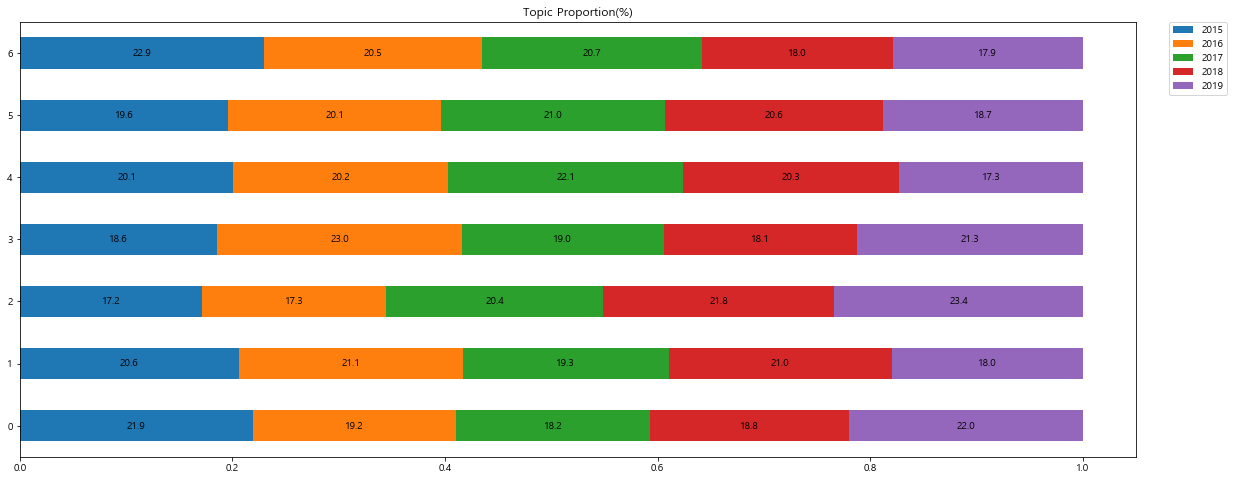

In [61]:
ax = result_df.plot.barh(stacked=True,legend=False,figsize=(20, 8), title="Topic Proportion(%)")
ax.legend(bbox_to_anchor=(1.03, 1),loc=2, borderaxespad=0.)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')